This notebook shows the process for fitting the error bars for the likelihood PDFs of the model count $\lambda$.  It generates files that are used in initializing the cratrcountr package.  

We include this for transparency and so that users can adjust the fits if they need higher precision or a wider range of N.  But be careful: If you run the save_PPFit() commands, you will be altering files used in initializing the package.  Proceed with caution.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import math
from scipy.stats.mstats import gmean
from scipy.stats import gamma, poisson, linregress, beta, norm, lognorm
from scipy import optimize
import time
import random
import pickle as pkl
from craterdata import *
%matplotlib inline

In [2]:
t1 = time.time()
N_array = np.logspace(-2, 8, 3000)
if False:
    error_bar_matrix = np.array([
        error_bar_log_N(N, n_points=1000000, log_spacing=True) 
        for N in N_array
    ])
    with open('saved/error_bar_matrix.pkl', 'wb') as f:
        pkl.dump(error_bar_matrix, f)
else:
    with open('saved/error_bar_matrix.pkl', 'rb') as f:
        error_bar_matrix = pkl.load(f)
t2 = time.time()
print(format_runtime(t2 - t1))

0.00079 seconds


In [3]:
t1 = time.time()
N_array = np.logspace(-2, 8, 3000)
if False:
    linear_error_bar_matrix = np.array([
        error_bar_linear_N(N, n_points=1000000, log_spacing=False) 
        for N in N_array
    ])
    with open('saved/linear_error_bar_matrix.pkl', 'wb') as f:
        pkl.dump(linear_error_bar_matrix, f)
else:
    with open('saved/linear_error_bar_matrix.pkl', 'rb') as f:
        linear_error_bar_matrix = pkl.load(f)
t2 = time.time()
print(format_runtime(t2 - t1))

0.0003 seconds


In [4]:
t1 = time.time()
N_array = np.logspace(-2, 8, 3000)
if False:
    auto_log_error_bar_matrix = np.array([
        error_bar_N(
            N, n_points=1000000, log_spacing=True, kind='auto log'
        ) 
        for N in N_array
    ])
    with open('saved/auto_log_error_bar_matrix.pkl', 'wb') as f:
        pkl.dump(auto_log_error_bar_matrix, f)
else:
    with open('saved/auto_log_error_bar_matrix.pkl', 'rb') as f:
        auto_log_error_bar_matrix = pkl.load(f)
t2 = time.time()
print(format_runtime(t2 - t1))

0.00037 seconds


In [5]:
X = np.log10(N_array)
Y_lower = np.log10(error_bar_matrix[:, 0])
Y_upper = np.log10(error_bar_matrix[:, 1])

inc = 0.1
edges = np.concatenate([
    np.arange(-2, 1 + inc, inc), np.array([2, 3, 4, 8])
])
lower_PPFit = get_PPFit(X, Y_lower, edges, polynomial_degree_7)
upper_PPFit = get_PPFit(X, Y_upper, edges, polynomial_degree_7)

(-2e-06, 2e-06)

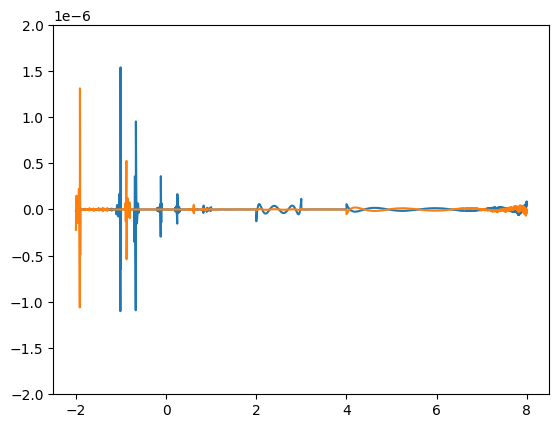

In [6]:
plt.plot(X, Y_lower - lower_PPFit.apply(X))
plt.plot(X, Y_upper - upper_PPFit.apply(X))
plt.ylim([-2E-6, 2E-6])

In [7]:
save_PPFit(lower_PPFit, 'files/lower_PPFit')
save_PPFit(upper_PPFit, 'files/upper_PPFit')

In [8]:
X = np.log10(N_array)
Y_lower_linear = np.log10(linear_error_bar_matrix[:, 0])
Y_upper_linear = np.log10(linear_error_bar_matrix[:, 1])

inc = 0.1
edges = np.concatenate([
    np.arange(-2, 1 + inc, inc), np.array([2, 3, 4, 8])
])
lower_PPFit_linear = get_PPFit(
    X, Y_lower_linear, edges, polynomial_degree_7
)
upper_PPFit_linear = get_PPFit(
    X, Y_upper_linear, edges, polynomial_degree_7
)

(-2e-06, 2e-06)

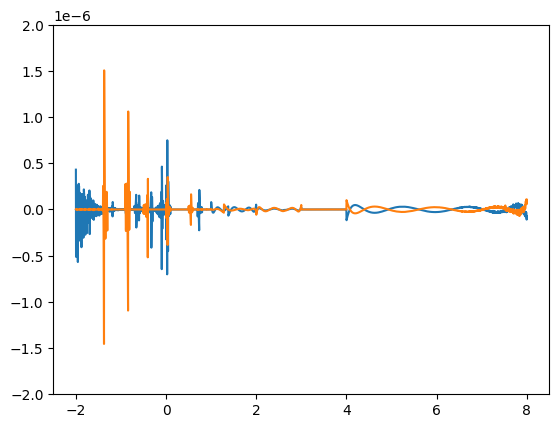

In [9]:
plt.plot(X, Y_lower_linear - lower_PPFit_linear.apply(X))
plt.plot(X, Y_upper_linear - upper_PPFit_linear.apply(X))
plt.ylim([-2E-6, 2E-6])

In [10]:
save_PPFit(lower_PPFit_linear, 'files/lower_PPFit_linear')
save_PPFit(upper_PPFit_linear, 'files/upper_PPFit_linear')

In [11]:
X = np.log10(N_array)
Y_val_auto_log = auto_log_error_bar_matrix[:, 0]
Y_lower_auto_log = np.log10(auto_log_error_bar_matrix[:, 1])
Y_upper_auto_log = np.log10(auto_log_error_bar_matrix[:, 2])

inc = 0.5
edges = np.concatenate([
    np.arange(-2, 1 + inc, inc), np.array([3, 8])
])
val_PPFit_auto_log = get_PPFit(
    X, Y_val_auto_log, edges, polynomial_degree_7
)
lower_PPFit_auto_log = get_PPFit(
    X, Y_lower_auto_log, edges, polynomial_degree_7
)
upper_PPFit_auto_log = get_PPFit(
    X, Y_upper_auto_log, edges, polynomial_degree_7
)

(-2e-06, 2e-06)

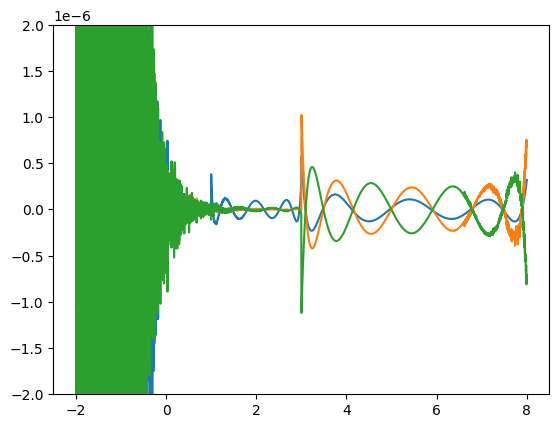

In [12]:
plt.plot(X, Y_val_auto_log - val_PPFit_auto_log.apply(X))
plt.plot(X, Y_lower_auto_log - lower_PPFit_auto_log.apply(X))
plt.plot(X, Y_upper_auto_log - upper_PPFit_auto_log.apply(X))
plt.ylim([-2E-6, 2E-6])

In [13]:
save_PPFit(val_PPFit_auto_log, 'files/val_PPFit_auto_log')
save_PPFit(lower_PPFit_auto_log, 'files/lower_PPFit_auto_log')
save_PPFit(upper_PPFit_auto_log, 'files/upper_PPFit_auto_log')

In [14]:
t1 = time.time()
N_array = np.logspace(-2, 8, 3000)
if False:
    log_linear_error_bar_matrix = np.array([
        error_bar_log_linear_N(N, n_points=100000) 
        for N in N_array
    ])
    with open('saved/log_linear_error_bar_matrix.pkl', 'wb') as f:
        pkl.dump(log_linear_error_bar_matrix, f)
else:
    with open('saved/log_linear_error_bar_matrix.pkl', 'rb') as f:
        log_linear_error_bar_matrix = pkl.load(f)
t2 = time.time()
print(format_runtime(t2 - t1))

0.00051 seconds


In [15]:
X = np.log10(N_array)
Y_val_log_linear = log_linear_error_bar_matrix[:, 0]
Y_lower_log_linear = np.log10(log_linear_error_bar_matrix[:, 1])
Y_upper_log_linear = np.log10(log_linear_error_bar_matrix[:, 2])

inc = 0.5
edges = np.concatenate([
    np.arange(-2, 1 + inc, inc), np.array([3, 8])
])
val_PPFit_log_linear = get_PPFit(
    X, Y_val_log_linear, edges, polynomial_degree_7
)
lower_PPFit_log_linear = get_PPFit(
    X, Y_lower_log_linear, edges, polynomial_degree_7
)
upper_PPFit_log_linear = get_PPFit(
    X, Y_upper_log_linear, edges, polynomial_degree_7
)

(-0.002, 0.002)

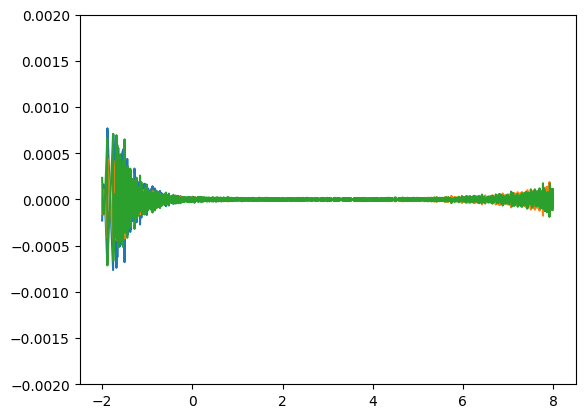

In [16]:
plt.plot(X, Y_val_log_linear - val_PPFit_log_linear.apply(X))
plt.plot(X, Y_lower_log_linear - lower_PPFit_log_linear.apply(X))
plt.plot(X, Y_upper_log_linear - upper_PPFit_log_linear.apply(X))
plt.ylim([-2E-3, 2E-3])

In [17]:
save_PPFit(val_PPFit_log_linear, 'files/val_PPFit_log_linear')
save_PPFit(lower_PPFit_log_linear, 'files/lower_PPFit_log_linear')
save_PPFit(upper_PPFit_log_linear, 'files/upper_PPFit_log_linear')

Calculate and save the N = 0 values

In [18]:
_X0, _P0 = true_error_pdf_XP(0, n_points=1000000)
_C0 = cumulative_trapezoid(_P0, _X0, initial=0)
_C0 = _C0 / _C0.max()
N_0_upper = np.interp(2 * p_1_sigma - 1, _C0, _X0)

left, N_0_upper_linear = error_bar_N(
    0, n_points=1000000, kind='linear'
)

N0_percentile_low = gamma.ppf(1 - p_1_sigma, 0 + 1)
N0_median = gamma.ppf(0.5, 0 + 1)
N0_percentile_high = gamma.ppf(p_1_sigma, 0 + 1)

N0_median_lower = N0_median - N0_percentile_low
N0_median_upper = N0_percentile_high - N0_median
ll_lower, ll_val, ll_upper = error_bar_log_linear_N(0, n_points=100000) 

N_0_dict = {
    'log' : (0, None, N_0_upper),
    'auto log' : (None, None, N_0_upper),
    'log linear' : (10**ll_lower, ll_val, 10**ll_upper),
    'linear' : (0, None, N_0_upper_linear),
    'median' : (N0_median, N0_median_lower, N0_median_upper),
    'mean' : (1, 1, 2),
    'sqrt(n)' : (None, None, None)
}

pd.DataFrame(N_0_dict).to_csv('files/N_0_dict.csv')